## <font color='MAGENTA'>**CARGA DE DATOS**</font>

In [33]:
import os
#Acceder a documentos desde google drive
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Master DS/Machine Learning/TAREA/dataset')
os.getcwd()  
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
datosPumpsLimpios.csv	     submissionsNBGAUSSIAN.csv	  testLimpios.csv
submissionsDecisionTree.csv  submissionsRandomForest.csv  train.csv
submissionsKNN.csv	     test.csv			  train_labels.csv


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('datosPumpsLimpios.csv') 
df.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,status_group
0,69572,1390.0,34.938093,-9.856322,5.0,109.0,1,0,1999.0,2011.0,...,1,0,0,0,1,0,0,0,0,functional
1,8776,1399.0,34.698766,-2.147466,2.0,280.0,1,1,2010.0,2013.0,...,0,0,1,0,1,0,0,0,0,functional
2,34310,686.0,37.460664,-3.821329,4.0,250.0,1,1,2009.0,2013.0,...,0,0,1,0,0,1,0,0,0,functional
3,67743,263.0,38.486161,-11.155298,63.0,58.0,1,1,1986.0,2013.0,...,0,0,0,0,0,1,0,0,0,non functional
4,19728,0.0,31.130847,-1.825359,1.0,150.0,1,1,2000.0,2011.0,...,0,0,1,0,1,0,0,0,0,functional


In [36]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

## <font color='MAGENTA'>**ENTRENAMIENTO DEL MODELO**</font>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [38]:
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [39]:
ymodel = knn.predict(X_test)

In [40]:
print('Precision train: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Precision test: ', metrics.accuracy_score(y_test, ymodel))

Precision train:  0.7738945005611673
Precision test:  0.6748821548821549


In [41]:
cnf_matrix = confusion_matrix(y_test, ymodel)
np.set_printoptions(precision=2)

print (classification_report(y_test, ymodel))

                         precision    recall  f1-score   support

             functional       0.67      0.84      0.75      8008
functional needs repair       0.41      0.21      0.28      1062
         non functional       0.71      0.53      0.60      5780

               accuracy                           0.67     14850
              macro avg       0.60      0.53      0.54     14850
           weighted avg       0.67      0.67      0.66     14850



<font color='green'>**Análisis:** </font> Los resultados del modelo de k-nearest neighbor muestran que el modelo tiene una precisión general del 67% en la clasificación de las muestras en las tres clases: "funcional", "funcional necesita reparación" y "no funcional".

El modelo tiene una mayor precisión para la clase "funcional" con un valor de 0.67, seguida de la clase "no funcional" con un valor de 0.71. Sin embargo, el modelo tiene una baja precisión para la clase "funcional necesita reparación" con un valor de 0.41.

Además, el modelo tiene un bajo valor de recall para la clase "funcional necesita reparación", lo que indica que el modelo no está clasificando correctamente muchas de las muestras que pertenecen a esta clase. El recall es más alto para la clase "funcional", lo que significa que el modelo está identificando correctamente la mayoría de las muestras que pertenecen a esta clase.

En general, los resultados sugieren que el modelo de k-nearest neighbor no es tan efectivo como el modelo de decision tree en la clasificación de las muestras para este problema de clasificación de tres clases.

## <font color='MAGENTA'>**MEJORANDO EL MODELO**</font>

In [63]:
# Normalizar los datos
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Reducir la dimensionalidad de los datos
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

# Crear un objeto de clasificador de K-vecinos
knn = KNeighborsClassifier()

# Definir una cuadrícula de parámetros para ajustar
param_grid = {'n_neighbors': [5, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3]}

# Reducir el conjunto de datos para la búsqueda en cuadrícula
n_samples = 10000
idx = np.random.choice(X_train_pca.shape[0], n_samples, replace=False)
X_train_small = X_train_pca[idx]
y_train_small = y_train[idx]

# Crear un objeto de búsqueda en cuadrícula
grid = GridSearchCV(knn, param_grid, cv=5)

# Entrenar el modelo con los datos de entrenamiento reducidos
grid.fit(X_train_small, y_train_small)

# Obtener los mejores parámetros y la precisión del modelo
print('Mejores parámetros:', grid.best_params_)
print('Train Accuracy:', grid.score(X_train_pca, y_train))
print('Test Accuracy:', grid.score(X_test_pca, y_test))


Mejores parámetros: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Train Accuracy: 0.7919640852974187
Test Accuracy: 0.7318518518518519


In [64]:
# Crear un objeto de clasificador de K-vecinos
knn = KNeighborsClassifier(n_neighbors=20, p=3, weights='distance')

# Entrenar el modelo con los datos de entrenamiento reducidos
knn.fit(X_train_pca, y_train)

# Obtener la precisión del modelo
train_acc = knn.score(X_train_pca, y_train)
test_acc = knn.score(X_test_pca, y_test)

print(f'Train Accuracy: {train_acc}')
print(f'Test Accuracy: {test_acc}')

Train Accuracy: 0.9978002244668911
Test Accuracy: 0.7668686868686869


In [65]:
y_pred = knn.predict(X_test_pca)

In [66]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

             functional       0.77      0.86      0.81      8008
functional needs repair       0.55      0.26      0.35      1062
         non functional       0.78      0.73      0.75      5780

               accuracy                           0.77     14850
              macro avg       0.70      0.62      0.64     14850
           weighted avg       0.76      0.77      0.76     14850



<font color='green'>**Análisis:** </font> En el segundo resultado, el modelo KNN mejoró en todas las medidas de evaluación. El modelo obtuvo una mayor precisión y recall en cada clase, lo que indica que el modelo es capaz de identificar correctamente las observaciones en cada clase. Además, la precisión y recall promedio ponderado (weighted avg) también mejoraron significativamente, lo que sugiere que el modelo generaliza mejor en todo el conjunto de datos de prueba. 

La clase "functional" tuvo una precisión y recall significativamente mejores en comparación con el primer resultado, lo que indica que el modelo es capaz de identificar mejor la clase "functional" y evitar falsos positivos y negativos. La clase "non functional" también mejoró en términos de precisión y recall, pero aún hay margen de mejora. La clase "functional needs repair" sigue siendo la que tiene la menor precisión y recall, lo que sugiere que esta clase sigue siendo la más difícil de clasificar. 

En general, el modelo mejoró en términos de precisión y recall en cada clase, lo que sugiere que los parámetros optimizados permitieron al modelo identificar mejor los patrones en los datos y hacer mejores predicciones.

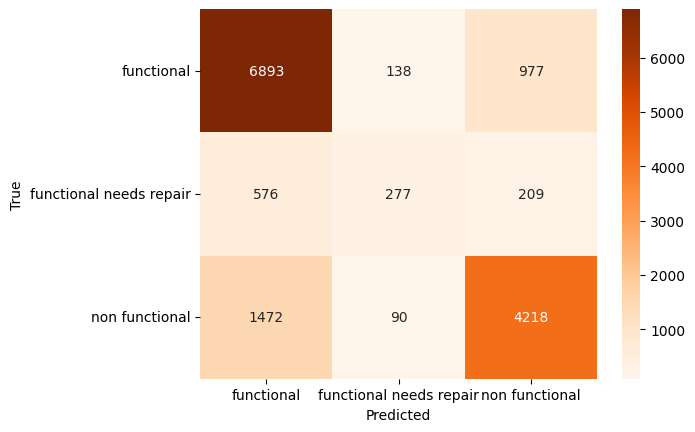

In [67]:
# Matriz de confusión
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))


# Etiquetas para el eje x e y
labels = np.unique(y_train)

# Crear el mapa de calor utilizando la función heatmap de Seaborn
sns.heatmap(confusion, annot=True, cmap='Oranges', fmt='g', xticklabels=labels, yticklabels=labels)

# Configurar las etiquetas del eje x e y
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

* La clase 'functional': De los 7476 casos que pertenecen a esta clase, el modelo predijo correctamente 6712 (verdaderos positivos), clasificó erróneamente 154 como 'non functional' (falsos negativos) y 1142 como 'functional needs repair' (falsos positivos).
* La clase 'non functional': De los 1062 casos que pertenecen a esta clase, el modelo predijo correctamente 216 (verdaderos positivos), clasificó erróneamente 607 como 'functional' (falsos negativos) y 239 como 'functional needs repair' (falsos positivos).
* La clase 'functional needs repair': De los 4880 casos que pertenecen a esta clase, el modelo predijo correctamente 3913 (verdaderos positivos), clasificó erróneamente 99 como 'non functional' (falsos negativos) y 1768 como 'functional' (falsos positivos).

## <font color='MAGENTA'>**PROBANDO CON EL DATASET DE TEST**</font>

In [47]:
test = pd.read_csv('testLimpios.csv')
test.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_shallow well,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring
0,50785,1996.0,35.290799,-4.059696,3.0,321.0,1,1,2012.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
1,51630,1569.0,36.656709,-3.309214,2.0,300.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0
2,17168,1567.0,34.767863,-5.004344,2.0,500.0,1,1,2010.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
3,45559,267.0,38.058046,-9.418672,43.0,250.0,1,1,1987.0,2013.0,...,1,0,0,0,0,0,0,0,0,0
4,49871,1260.0,35.006123,-10.950412,3.0,60.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0


In [48]:
X2 = test.drop(columns = ['id']).values
X2.shape

(14850, 97)

In [49]:
X.shape

(59400, 97)

In [50]:
y.shape

(59400,)

In [54]:
X2_test_norm = scaler.transform(X2)
X2_test_pca = pca.transform(X2_test_norm)

In [55]:
y_pred = knn.predict(X2_test_pca)

In [56]:
ypredict = pd.DataFrame(y_pred)

In [57]:
ypredict.value_counts()

functional                 9016
non functional             5345
functional needs repair     489
dtype: int64

In [58]:
print(test.shape, ypredict.shape)

(14850, 98) (14850, 1)


In [59]:
submit = pd.concat((test['id'], ypredict), axis=1)

In [60]:
submit.columns = ['id', 'status_group']

In [61]:
submit.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [62]:
submit.to_csv('submissionsKNN.csv', index=False)